In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import utils
from darts import TimeSeries
import numpy as np
import pandas as pd
from darts.utils import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from darts.metrics import rmse, mape, r2_score

In [31]:
df = utils.load_data()
ts, covars_diff, covars_nodiff = utils.df2ts(df)

# Plot raw values

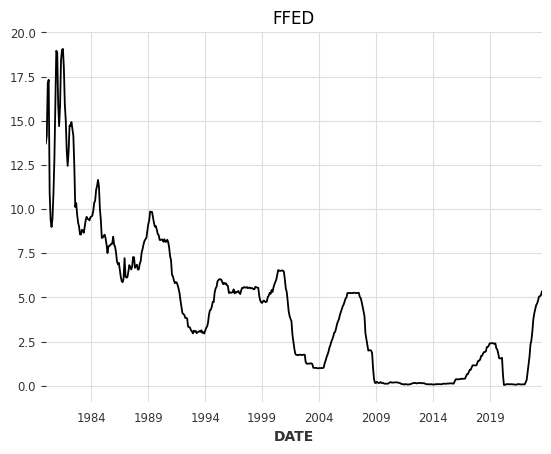

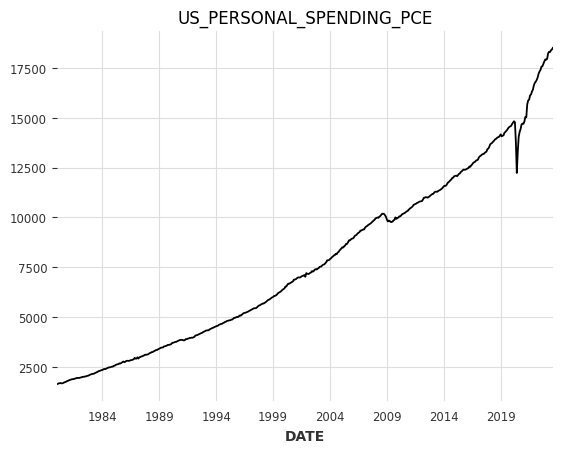

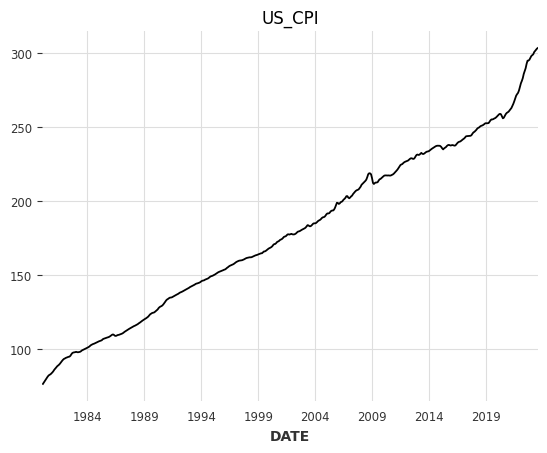

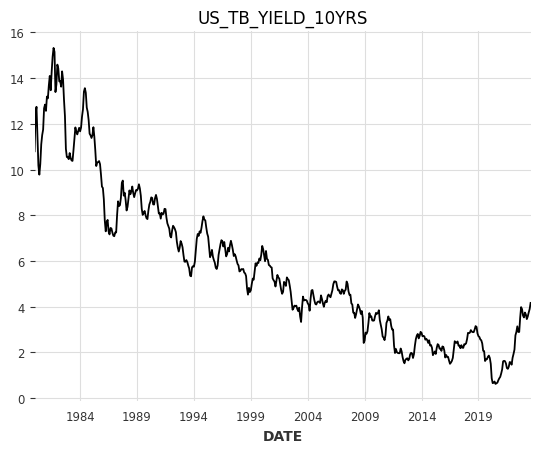

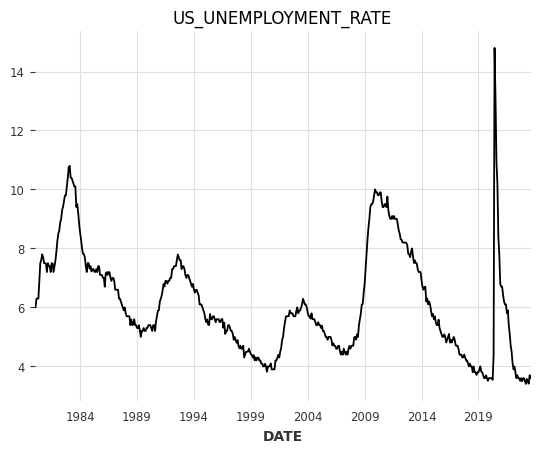

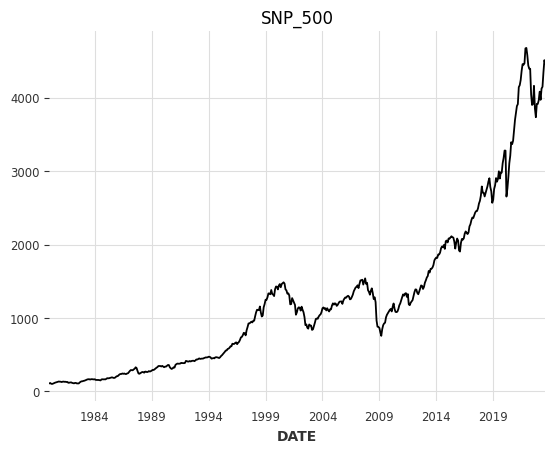

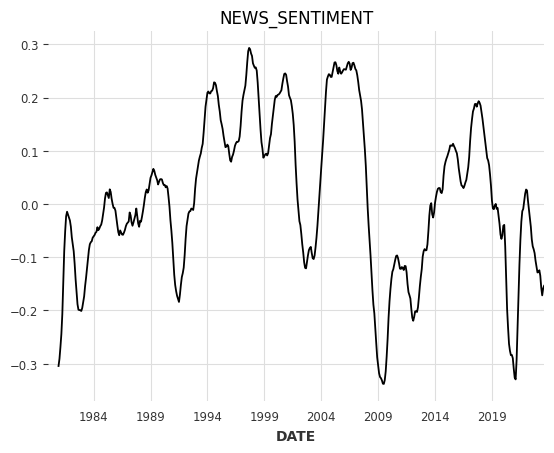

In [32]:
for col in df.columns:
    df[col].plot(title=col)
    plt.show()

# Correlation

In [33]:
covars_diff_pipeline, covars_diff_scaled = utils.scale_ts(covars_diff, should_diff=True)
covars_nodiff_pipeline, covars_nodiff_scaled = utils.scale_ts(
    covars_nodiff, should_diff=False
)
pipeline, ts_scaled = utils.scale_ts(ts, should_diff=True)

train_ts_scaled, val_ts_scaled = ts_scaled.split_after(pd.Timestamp("2016-01-01"))
train_ts, val_ts = ts.split_after(pd.Timestamp("2016-01-01"))

covariates_scaled = covars_diff_scaled.stack(covars_nodiff_scaled)
train_covariates_scaled, val_covariates_scaled = covariates_scaled.split_after(
    pd.Timestamp("2016-01-01")
)

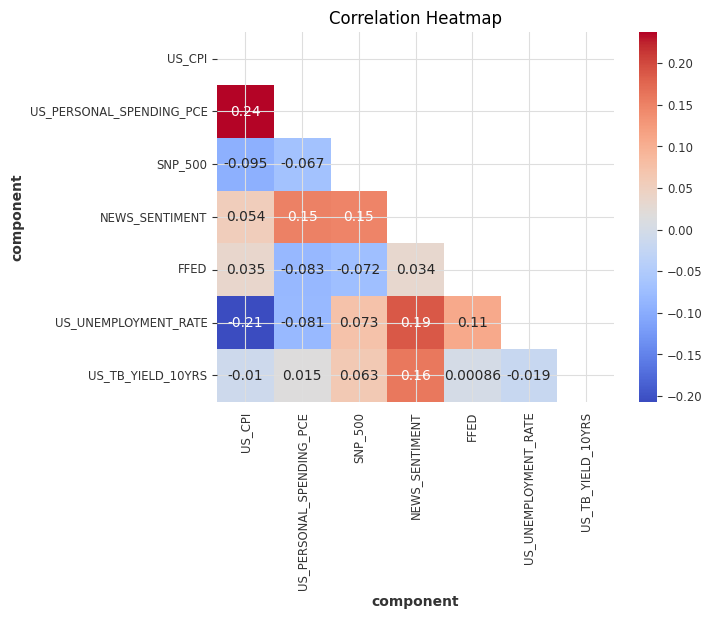

In [34]:
covariates_scaled = covariates_scaled.stack(ts_scaled)
df = covariates_scaled.pd_dataframe()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot the heatmap with the mask
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

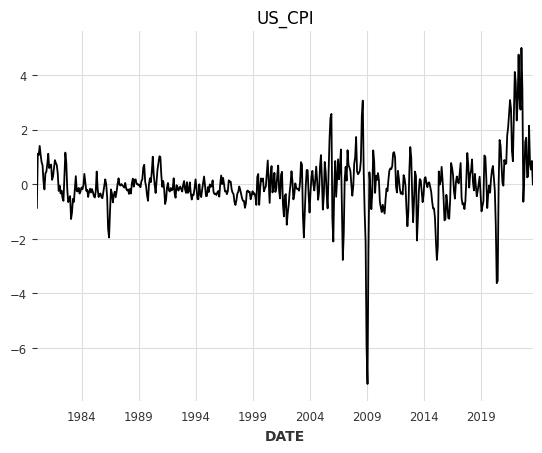

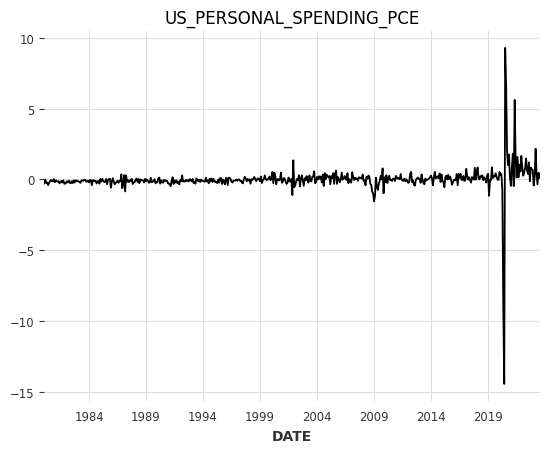

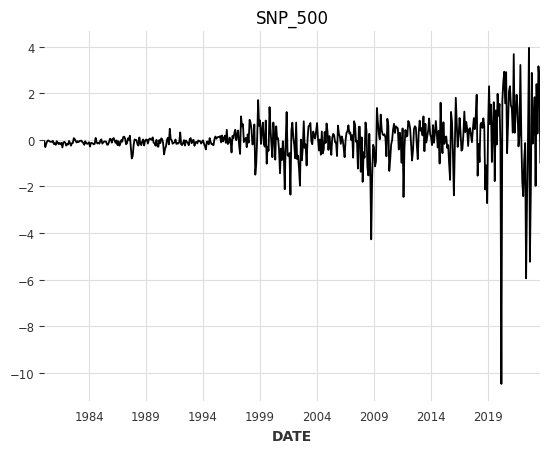

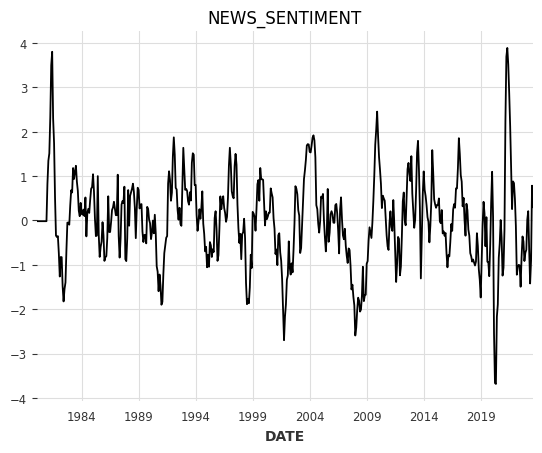

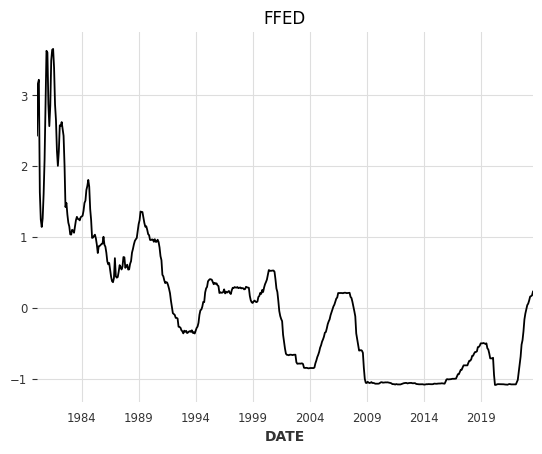

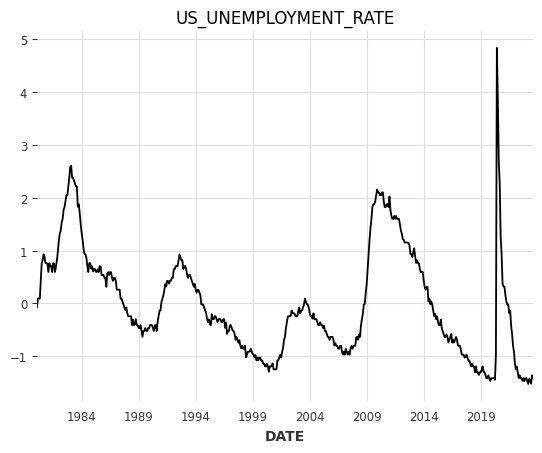

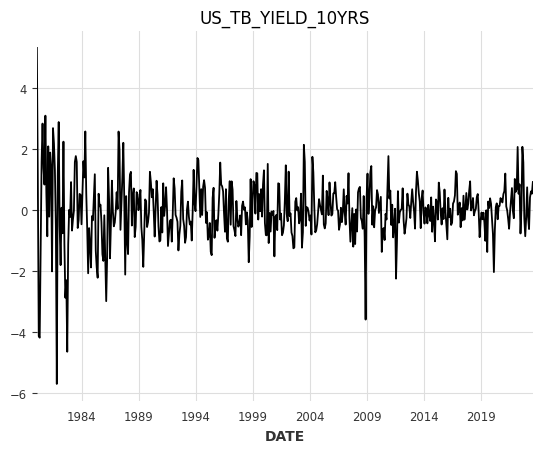

In [35]:
for col in df.columns:
    df[col].plot(title=col)
    plt.show()

# Granger Causality

<Axes: xlabel='DATE'>

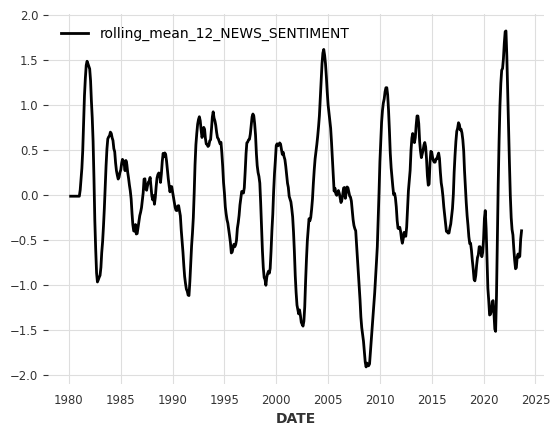

In [ ]:
sent = TimeSeries.from_dataframe(df,value_cols= ['NEWS_SENTIMENT'])
sent_pipeline, sent_scaled = utils.scale_ts(sent, should_diff=True)
sent_scaled.plot()

In [26]:
# Null hypothesis: the time series is non-stationary
utils.adf_test(sent_scaled.pd_series())

Results of Dickey-Fuller Test:


Test Statistic                -6.298163e+00
p-value                        3.464508e-08
#Lags Used                     1.300000e+01
Number of Observations Used    5.090000e+02
Critical Value (1%)           -3.443263e+00
Critical Value (5%)           -2.867235e+00
Critical Value (10%)          -2.569803e+00
dtype: float64

In [27]:
# Null hypothesis: the time series is stationary
utils.kpss_test(sent_scaled.pd_series())

Results of KPSS Test:


/Users/Xavier/cdpq-ia/utils.py:378: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


Test Statistic            0.060001
p-value                   0.100000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

In [38]:
results = statistics.granger_causality_tests(ts_scaled, ts_scaled, maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=520, df_num=1
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=55.0121 , p=0.0000  , df_denom=520, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=518, df_num=2
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=39.7895 , p=0.0000  , df_denom=518, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=516, df_num=3
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=3
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=3
parameter F test:         F=25.7618 , p=0.0000  , df_denom=516, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0000  , p=1.0000  

/Users/Xavier/cdpq-ia/venv/lib/python3.11/site-packages/darts/utils/statistics.py:462: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(ts.values(copy=False), regression, nlags)
/Users/Xavier/cdpq-ia/venv/lib/python3.11/site-packages/darts/utils/statistics.py:462: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(ts.values(copy=False), regression, nlags)


In [ ]:
utils.load_data_dict()

,FEATURE_NAME,FEATURE_CATEGORY,FEATURE_DESCRIPTION
0,US_CPI,INFLATION,"Consumer Price Index for the United States, me..."
1,US_CPI_EXCL_FOOD_N_ENERGY,INFLATION,Consumer Price Index for the United States exc...
2,US_PERSONAL_SPENDING_PCE,INFLATION,"Personal Consumption Expenditures Price Index,..."
3,CANADA_CPI,INFLATION,"Consumer Price Index for Canada, measuring the..."
4,CANADA_CPI_EXCL_FOOD_N_ENERGY,INFLATION,Consumer Price Index for Canada excluding food...
5,US_CAPACITY_UTILIZATION,GDP_ECONOMIC_GROWTH,Percentage of resources used by corporations a...
6,US_M2,GDP_ECONOMIC_GROWTH,Measure of the money supply that includes cash...
7,US_CONSUMER_CREDIT,GDP_ECONOMIC_GROWTH,Total amount of credit extended to individuals...
8,US_INDUSTRIAL_PRODUCTION,GDP_ECONOMIC_GROWTH,Measure of the output of the industrial sector...
9,US_NFP_ESTABLISHMENT_DATA,GDP_ECONOMIC_GROWTH,"Nonfarm Payrolls data, representing the total ..."
